<a href="https://colab.research.google.com/github/vannicc/CCADMACL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2: Use Gradient Boost for Regression

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
Submit your results to:
https://www.kaggle.com/competitions/playground-series-s4e12/overview



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error

## Dataset
Train, test and sample submission file can be found in this link
https://www.kaggle.com/competitions/playground-series-s4e12/data

## 1. Load the Data

In [24]:
# put your answer here

# Load datasets
train_df = pd.read_csv('train (2).csv')
test_df = pd.read_csv('test (2).csv')
sample_submission = pd.read_csv('sample_submission (2).csv')

## 2. Perform Data preprocessing

In [33]:
# Check and handle missing values in the target variable
y = train_df['Premium Amount']
y.fillna(y.median(), inplace=True)  # Replace NaN in target with median

# Define features and target
X = train_df.drop(columns=['Premium Amount', 'id'])  # Features
X_test = test_df.drop(columns=['id'])  # Features for test
id_column = test_df['id']  # Save IDs for submission

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 3. Create a Pipeline

In [34]:
# Define the model
model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    random_state=42)

# Create a pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


## 4. Train the Model

In [35]:
# Split the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# put your answer here
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object'))])),
                ('model',
                 GradientBoostingRegressor(n_estimators=200, random_state=42))])

## 5. Evaluate the Model

In [37]:
# Predict on validation data
y_pred = pipeline.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))

print(f'RMSE: {rmse}')
print(f'RMSLE: {rmsle}')

RMSE: 856.3931701452747
RMSLE: 1.1647248568314301


## Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [38]:
# Preprocess the test dataset
X_test = test_df.drop(columns=['id'])
id_column = test_df['id']

# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': id_column,
    'Premium Amount': y_test_pred
})

# Save to CSV
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


In [39]:
submission = pd.read_csv('submission_file.csv')
submission.shape

(800000, 2)

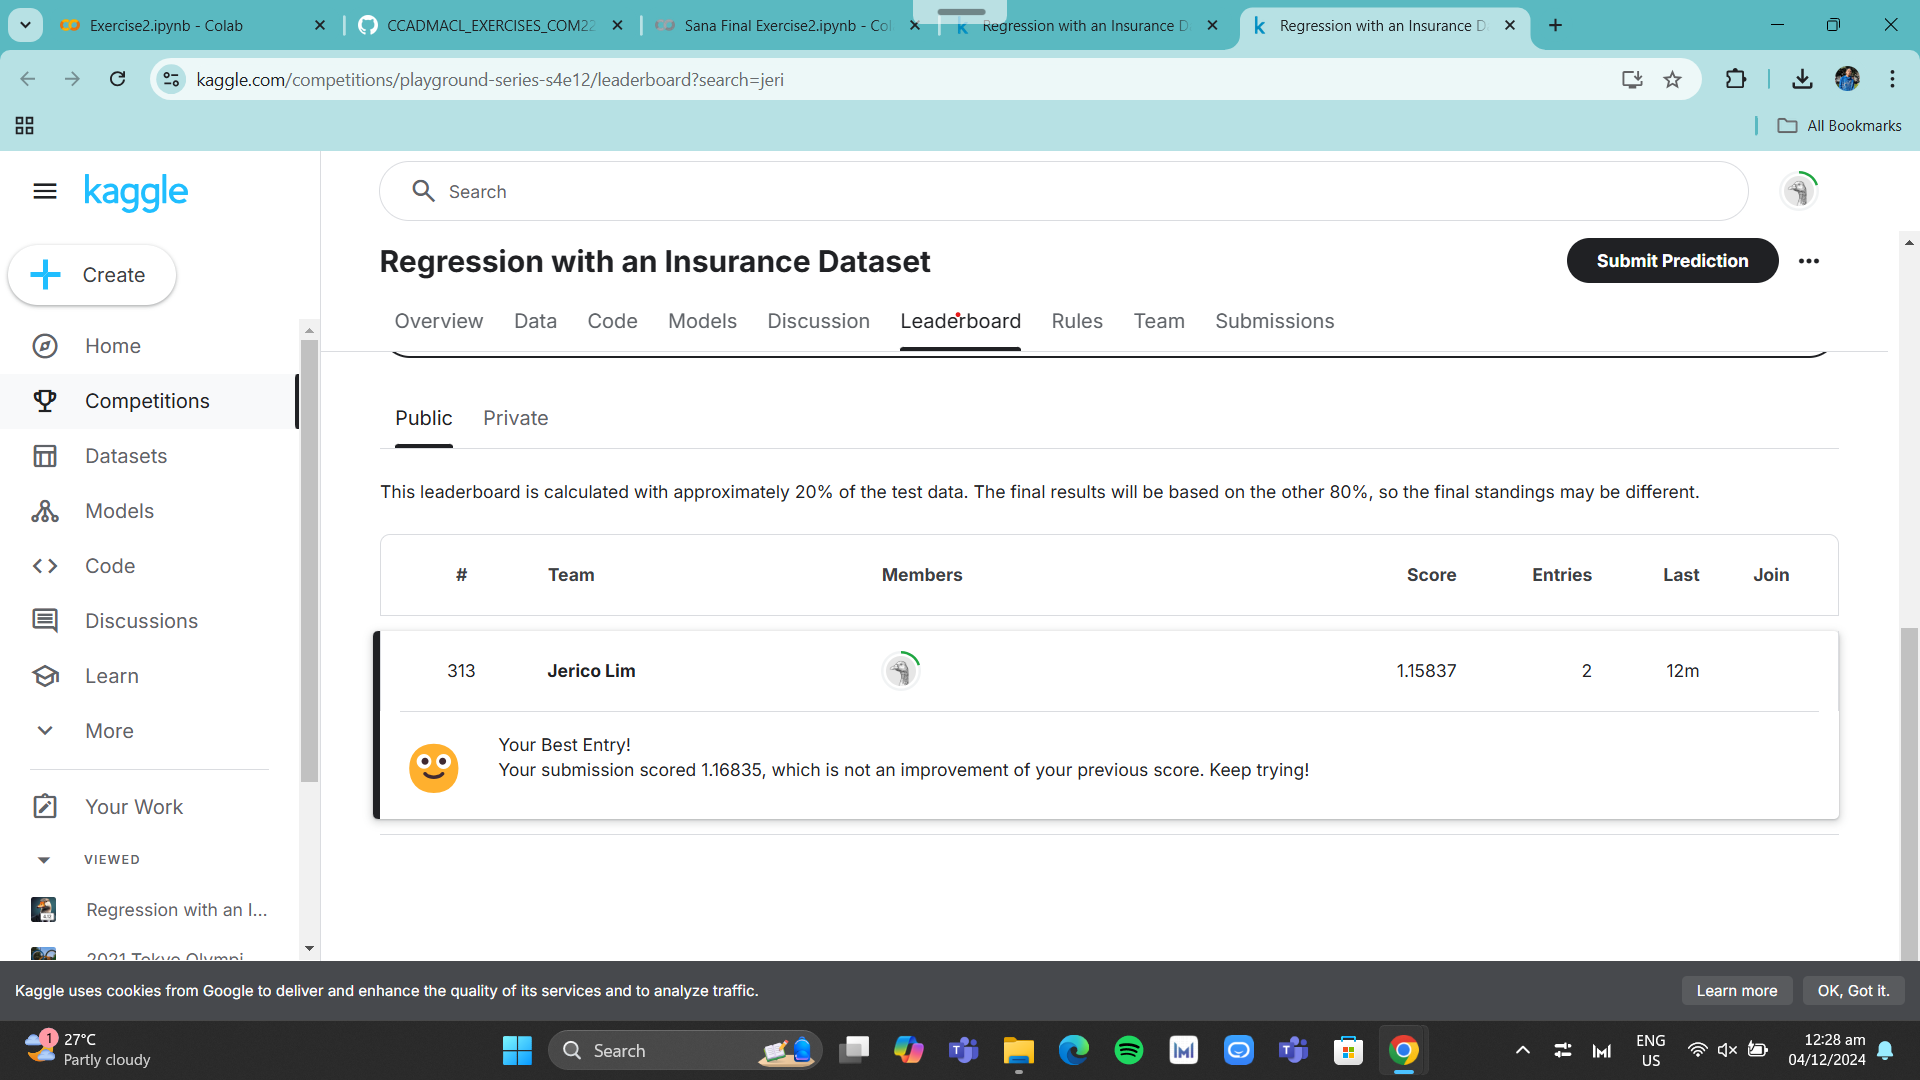

In [40]:
from IPython.display import Image
Image('CCADMACL_EXERCISE2.png')